In [27]:
import pandas as pd

patients_df = pd.read_csv('subjects_diseases.csv')

In [28]:
patients_df.head()

,subject_id,icd9_code,short_title,long_title
0,10006,99591,Sepsis,Sepsis
1,10006,99662,React-oth vasc dev/graft,Infection and inflammatory reaction due to oth...
2,10006,40391,Hyp kid NOS w cr kid V,"Hypertensive chronic kidney disease, unspecifi..."
3,10006,42731,Atrial fibrillation,Atrial fibrillation
4,10006,4280,CHF NOS,"Congestive heart failure, unspecified"


In [29]:
kidney_diseases_df = patients_df[
    (patients_df['icd9_code'] >= '580') & (patients_df['icd9_code'] <= '589')
]
kidney_diseases_df

,subject_id,icd9_code,short_title,long_title
52,10019,5845,"Ac kidny fail, tubr necr",Acute kidney failure with lesion of tubular ne...
71,10027,5859,Chronic kidney dis NOS,"Chronic kidney disease, unspecified"
83,10029,5856,End stage renal disease,End stage renal disease
106,10032,5849,Acute kidney failure NOS,"Acute kidney failure, unspecified"
109,10033,5849,Acute kidney failure NOS,"Acute kidney failure, unspecified"
...,...,...,...,...
1622,43881,5856,End stage renal disease,End stage renal disease
1673,44212,5845,"Ac kidny fail, tubr necr",Acute kidney failure with lesion of tubular ne...
1685,44212,5855,Chron kidney dis stage V,"Chronic kidney disease, Stage V"
1695,44222,5849,Acute kidney failure NOS,"Acute kidney failure, unspecified"


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [31]:
patients_df = pd.read_csv('D_ICD_DIAGNOSES.csv')


In [32]:
kidney_diseases_df = patients_df[
    (patients_df['icd9_code'] >= '580') & (patients_df['icd9_code'] <= '589')
]
kidney_diseases_df

,row_id,icd9_code,short_title,long_title
5875,5876,5800,Ac proliferat nephritis,Acute glomerulonephritis with lesion of prolif...
5876,5877,5804,Ac rapidly progr nephrit,Acute glomerulonephritis with lesion of rapidl...
5877,5878,58081,Ac nephritis in oth dis,Acute glomerulonephritis in diseases classifie...
5878,5879,58089,Acute nephritis NEC,Acute glomerulonephritis with other specified ...
5879,5880,5809,Acute nephritis NOS,Acute glomerulonephritis with unspecified path...
5880,5881,5810,"Nephrotic syn, prolifer",Nephrotic syndrome with lesion of proliferativ...
5881,5882,5811,Epimembranous nephritis,Nephrotic syndrome with lesion of membranous g...
5882,5883,5812,Membranoprolif nephrosis,Nephrotic syndrome with lesion of membranoprol...
5883,5884,5813,Minimal change nephrosis,Nephrotic syndrome with lesion of minimal chan...
5884,5885,58181,Nephrotic syn in oth dis,Nephrotic syndrome in diseases classified else...


In [ ]:
kidney_diseases_df['text'] = kidney_diseases_df['short_title'] + ' ' + kidney_diseases_df['long_title']

In [34]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(kidney_diseases_df['text'])


In [ ]:
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)


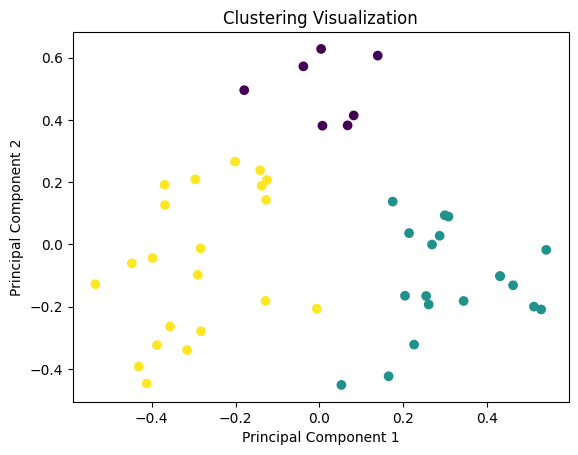

In [36]:
pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())

plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.show()


In [37]:

user_input = input("Enter the text: ")

user_tfidf = vectorizer.transform([user_input])

predicted_cluster_label = kmeans.predict(user_tfidf)[0]
print(f"The predicted cluster label for the input is: Cluster {predicted_cluster_label + 1}")


Enter the text: kidney failure
The predicted cluster label for the input is: Cluster 2
